In [217]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt


#importing dataset
df = pd.read_csv(r"C:\Users\HP\Desktop\Paraolmypics 2024 medals.csv")
#reading dataset
df.head(15)

,Ranking,Country,Gold,Silver,Bronze,Total
0,1,China,94,76,50,220
1,2,Great Britain,49,44,31,124
2,3,United States,36,42,27,105
3,4,Netherlands,27,17,12,56
4,5,Brazil,25,26,38,89
5,6,Italy,24,15,32,71
6,7,Ukraine,22,28,32,82
7,8,France,19,28,28,75
8,9,Australia,18,17,28,63
9,10,Japan,14,10,17,41


In [93]:
#data cleaning(finding null values)
df_dropped = df.dropna()
df_dropped.isnull().sum()

Ranking    0
Country    0
Gold       0
Silver     0
Bronze     0
Total      0
dtype: int64

In [94]:
#another method to check if any null values present in the entire data set
df_dropped.isnull().values.any()

False

In [245]:
#data cleaning #find duplicate rows      
duplicate_rows = df.duplicated()
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
164    False
165    False
166    False
167    False
168    False
Length: 169, dtype: bool


In [97]:
#describing the categories for different stats
df.describe()

,Ranking,Gold,Silver,Bronze,Total
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,64.153846,3.094675,3.130178,3.455621,9.680473
std,27.665950,9.540791,8.628281,7.911684,25.300897
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,0.000000,0.000000,0.000000,0.000000
50%,79.000000,0.000000,0.000000,0.000000,1.000000
75%,86.000000,2.000000,3.000000,3.000000,7.000000
max,86.000000,94.000000,76.000000,50.000000,220.000000


In [239]:
#correlation 
correlation = df.select_dtypes(include='number').corr()
#print the correlation
print(correlation)

          Ranking      Gold    Silver    Bronze     Total
Ranking  1.000000 -0.608768 -0.645694 -0.740467 -0.681307
Gold    -0.608768  1.000000  0.967176  0.857226  0.974984
Silver  -0.645694  0.967176  1.000000  0.903961  0.988414
Bronze  -0.740467  0.857226  0.903961  1.000000  0.944232
Total   -0.681307  0.974984  0.988414  0.944232  1.000000


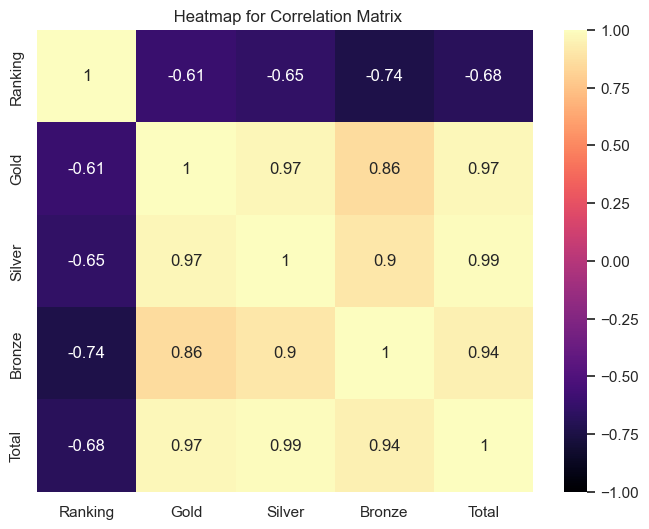

In [243]:
#creating heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sb.heatmap(correlation, annot=True, cmap='magma', vmin=-1, vmax=1)
#title
plt.title(" Heatmap for Correlation Matrix")
#plot the heatmap
plt.show()

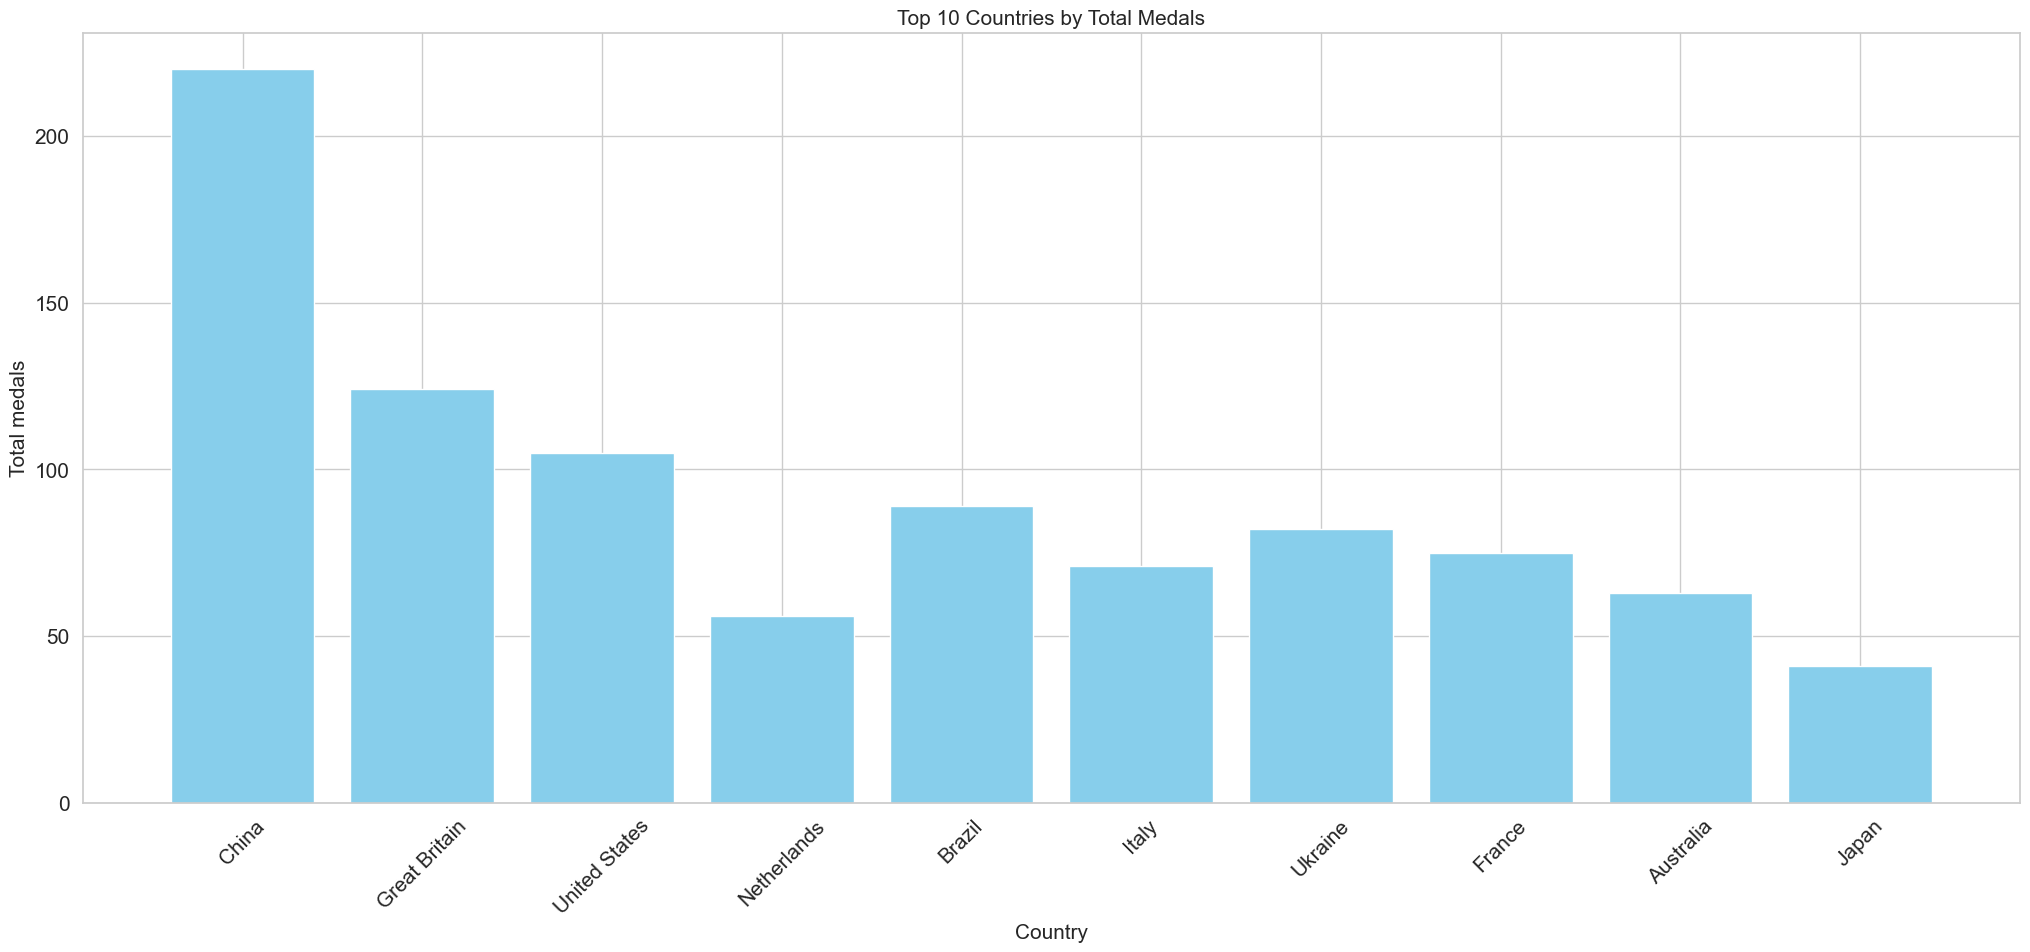

In [247]:
#create a bar chart for top 10 countries
def plot_bar_chart(data):
    sb.set(style='whitegrid')
    plt.figure(figsize=(25,10))
    plt.bar(data['Country'][:10], data['Total'][:10], color='skyblue')
    #title
    plt.title('Top 10 Countries by Total Medals', fontsize = 15)
    #adding labels for axis
    plt.xlabel('Country', fontsize = 15) 
    plt.ylabel('Total medals', fontsize = 15)
    plt.xticks(rotation=45, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.savefig("bar.png")
    #plot the bar chart
plot_bar_chart(df)    

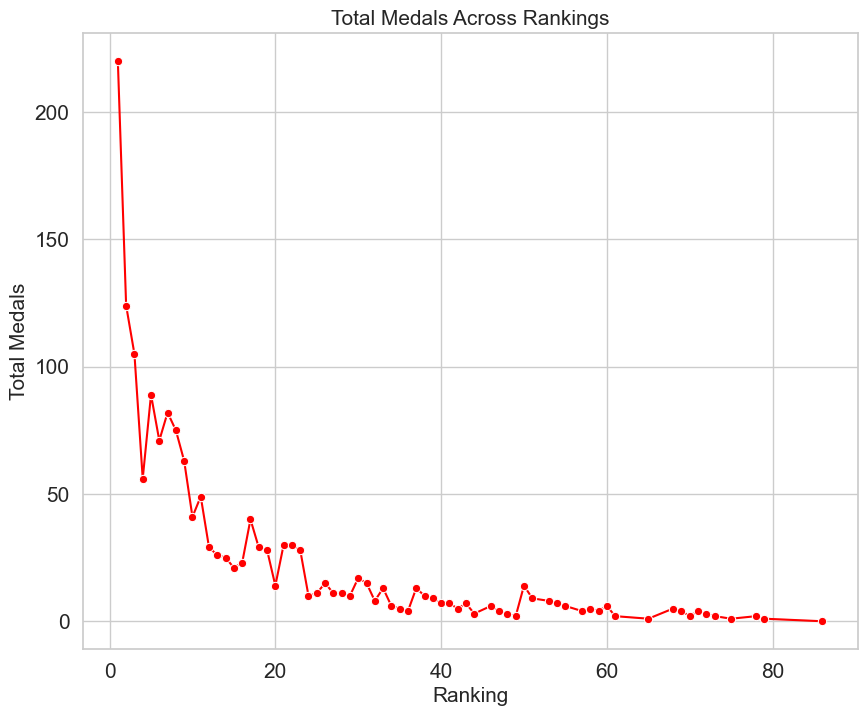

In [231]:
# create a line graph for Total Medals Across Rankings
def plot_line(data):
    sb.set(style='whitegrid')
    #figure size
    plt.figure(figsize=(10,8))
    sb.lineplot(x = 'Ranking', y = 'Total', data=data, color = 'red', marker = 'o')
    #title and labels
    plt.title('Total Medals Across Rankings', fontsize=15)
    plt.xlabel('Ranking', fontsize=15)
    plt.ylabel('Total Medals', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("line.png")
    #plot the line graph
plot_line(df)

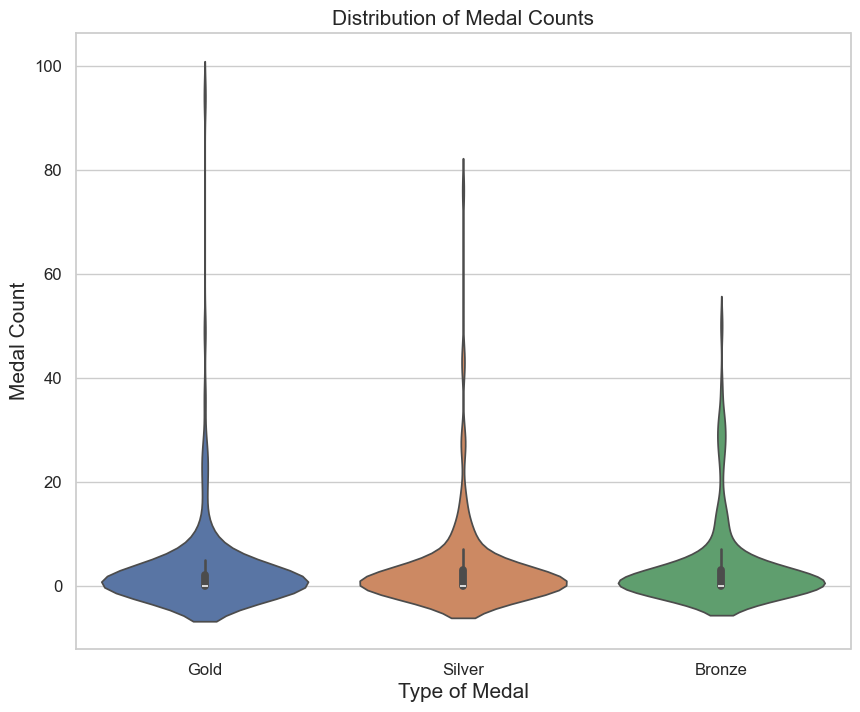

In [233]:
#create a violin plot for Distribution of Medal Counts 
def violin_plot(data):
    sb.set(style='whitegrid')
    plt.figure(figsize=(10,8))
    sb.violinplot(data=data[['Gold','Silver','Bronze']])
    #labels & title
    plt.title('Distribution of Medal Counts', fontsize=15)
    plt.xlabel('Type of Medal', fontsize=15)
    plt.ylabel('Medal Count', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.savefig("violin.png")
    #executing the violin plot
violin_plot(df)